In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from researchlib.single_import import *

In [131]:
train_loader = VisionDataset(vision.KMNIST, 32)

In [149]:
g = builder([
    nn.Linear(74, 8*4*4),
    nn.BatchNorm1d(8*4*4),
    nn.ReLU(),
    layer.Reshape((-1, 8, 4, 4)),
    AutoConvTransposeNet2d(8, 3, start_filter=128, min_filter=128),
    nn.Conv2d(128, 1, 5),
    nn.Sigmoid(),
])  

8 128
128 128
128 128


In [150]:
d = builder([
    layer.ConditionProjection(builder([
        nn.Linear(10, 784),
        nn.BatchNorm1d(784),
        nn.ReLU(),
        layer.Reshape((-1, 1, 28, 28)),
    ])),
    AutoConvNet2d(2, 4, start_filter=128, max_filter=128),
    nn.Linear(128, 1),
])

2 128
128 128
128 128
128 128


In [151]:
runner = Runner(GANModel(g, d, latent_vector_len=64, condition_vector_len=[10, 10], condition_onehot=True),
                train_loader, 
                None, 
                'rmsprop', 
                GANLoss('wgan-gp'),
                monitor_state='g_loss',
                monitor_mode='min')

In [152]:
runner.init_model('orthogonal')

In [ ]:
runner.fit(4)

  Epochs   train_d_loss  train_g_loss 
    1*       -1.7764       -0.1648    


    2        -18.5882      20.1874    


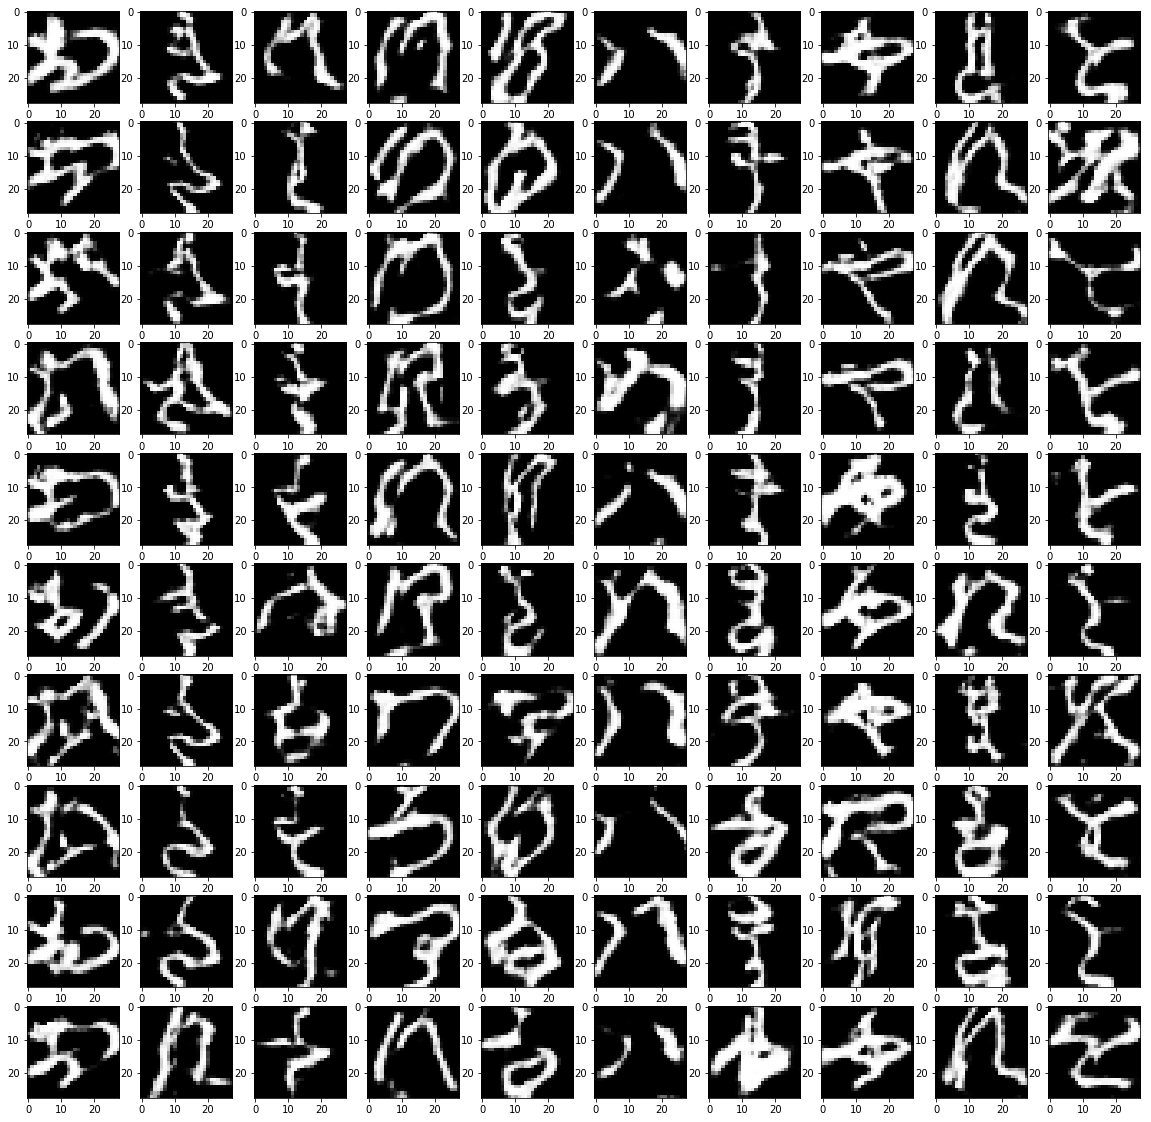

In [154]:
img = runner.model.sample(100, condition_data=list(range(10))*10)
import matplotlib.pyplot as plt
fig, arr = plt.subplots(10, 10, figsize=(20, 20))
for i in range(100):
    r = img[i][0].detach().cpu().numpy()#.transpose(1,2,0)
    r -= r.min()
    r /= r.max()
    arr[i//10][i%10].imshow(r, cmap='gray')
plt.show()

In [155]:
runner.report()

Experiment: default
Checkpoints are saved in ./checkpoint/default


Epoch,train_d_loss,train_g_loss,saved
1,-1.776410,-0.164806,*
2,-18.588201,20.187368,
3,-32.844698,89.457314,
4,-24.755059,92.720361,
